In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
single_image = X_train[0]
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

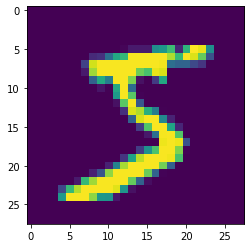

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,num_classes=10)

In [19]:
single_image.max(), single_image.min()

(255, 0)

In [20]:
X_train = X_train / 255

X_test = X_test / 255

In [21]:
scaled_image = X_train[0]

In [22]:
scaled_image.max()

1.0

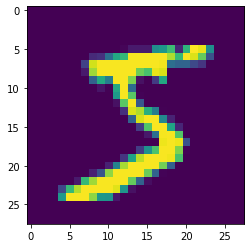

In [23]:
plt.imshow(scaled_image)

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
## batchsize,width,height,olor chanel
X_train = X_train.reshape(60000, 28, 28,1)

X_test = X_test.reshape(10000, 28, 28,1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten


In [27]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

## output layer (multi class)

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor="val_loss",patience=1)

In [32]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 56s 927us/sample - loss: 0.1316 - accuracy: 0.9608 - val_loss: 0.0559 - val_accuracy: 0.9827
Epoch 2/10
60000/60000 [==============================] - 53s 876us/sample - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0471 - val_accuracy: 0.9842
Epoch 3/10
60000/60000 [==============================] - 53s 880us/sample - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0422 - val_accuracy: 0.9862
Epoch 4/10
60000/60000 [==============================] - 53s 886us/sample - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0487 - val_accuracy: 0.9846


In [34]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.131644,0.960767,0.055919,0.9827
1,0.045326,0.986150,0.047142,0.9842
2,0.027616,0.991267,0.042235,0.9862
3,0.019206,0.993933,0.048676,0.9846


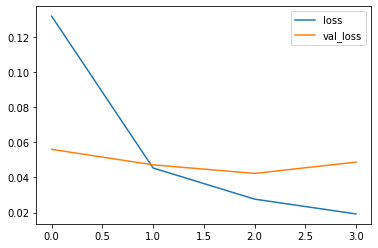

In [36]:
metrics[["loss","val_loss"]].plot()

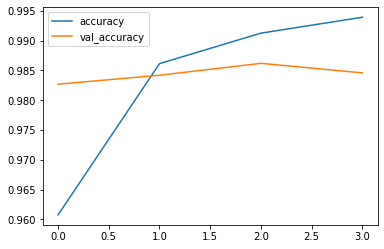

In [37]:
metrics[["accuracy","val_accuracy"]].plot()

In [40]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04867622484749445, 0.9846]

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
predictions = model.predict_classes(X_test)
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [45]:
y_cat_test.shape

(10000, 10)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [48]:
print(confusion_matrix(y_test,predictions))

[[ 973    0    0    0    0    0    3    0    1    3]
 [   0 1133    0    0    0    1    0    0    1    0]
 [   6    7  995    5    1    0    0    7   11    0]
 [   0    0    0 1003    0    3    0    1    3    0]
 [   0    0    1    0  963    0    3    0    2   13]
 [   2    0    0    4    0  883    1    0    2    0]
 [   6    3    0    1    1    4  940    0    3    0]
 [   1    2    7    0    0    0    0 1012    2    4]
 [   7    0    0    2    0    1    0    2  961    1]
 [   3    3    0    4    3    3    0    5    5  983]]


In [49]:
import seaborn as sns

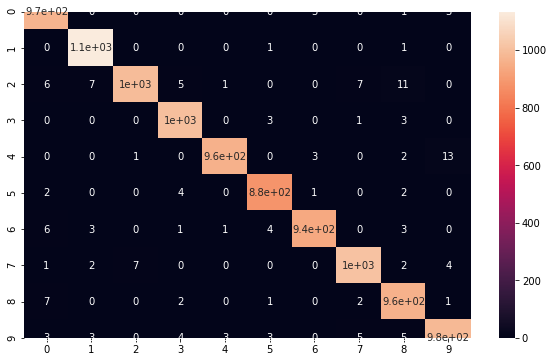

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

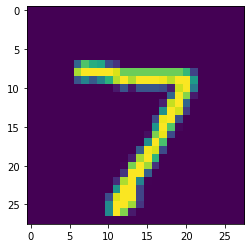

In [51]:
my_number = X_test[0]
plt.imshow(my_number.reshape(28,28))

In [52]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)